<a href="https://colab.research.google.com/github/Rajha2157/Gitcommands/blob/main/Turnover_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the dataset
data=pd.read_excel('1673873196_hr_comma_sep.xlsx')

In [ ]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Perform the following steps:
1.	Perform data quality checks by checking for missing values, if any
2.	Understand what factors contributed most to employee turnover by EDA
2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data
2.2.	Draw the distribution plot of
■	Employee Satisfaction (use column satisfaction_level)
■	Employee Evaluation (use column last_evaluation)
■	Employee Average Monthly Hours (use column average_montly_hours)
2.3.	Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot


In [ ]:
# missing values
data.isnull().sum().any()

False

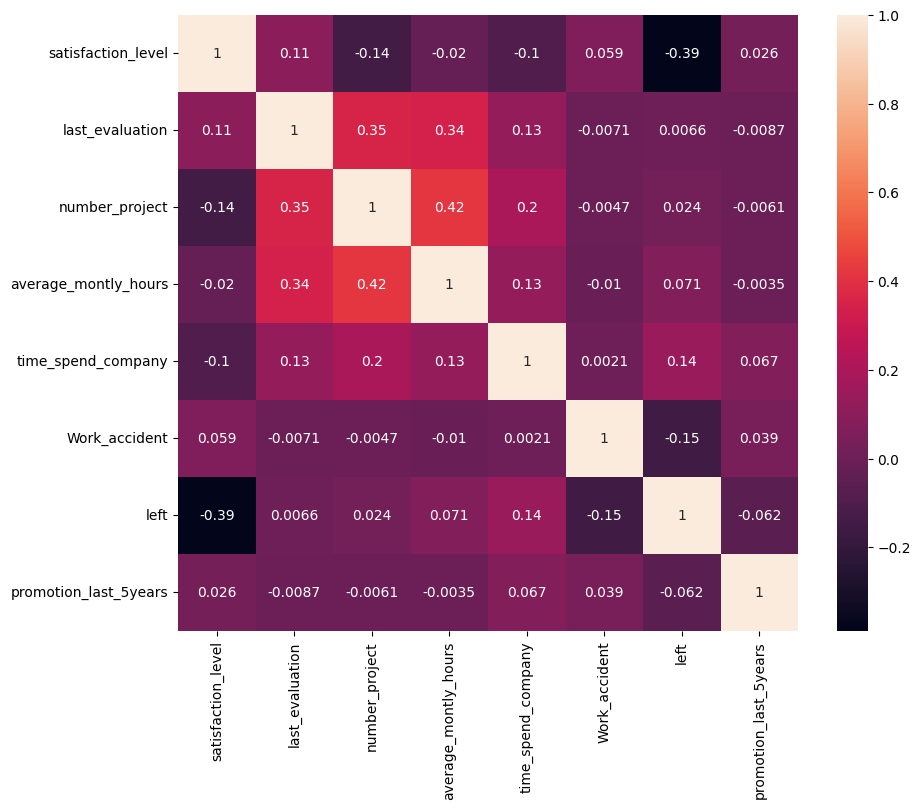

In [ ]:
# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

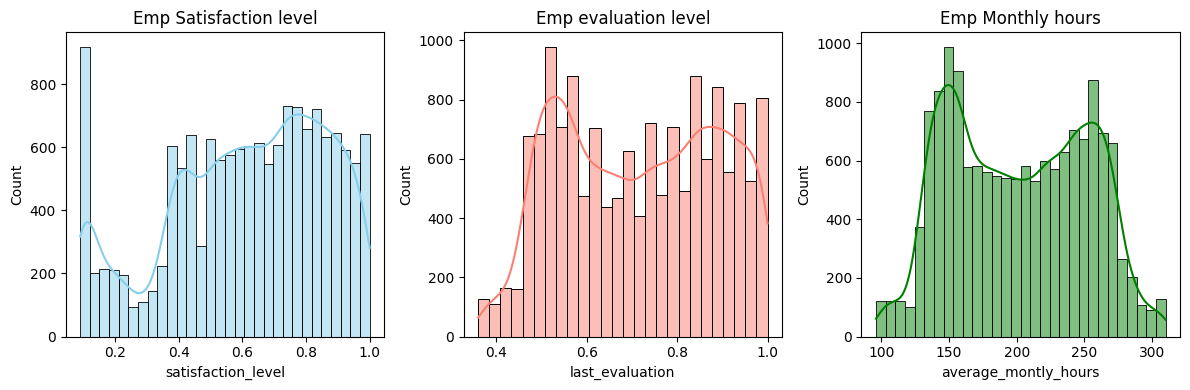

In [ ]:
# displot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data['satisfaction_level'],kde=True,color='skyblue')
plt.title('Emp Satisfaction level')

plt.subplot(1,3,2)
sns.histplot(data['last_evaluation'],kde=True,color='salmon')
plt.title('Emp evaluation level')

plt.subplot(1,3,3)
sns.histplot(data['average_montly_hours'],kde=True,color='green')
plt.title('Emp Monthly hours')

plt.tight_layout()
plt.show()

## Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot

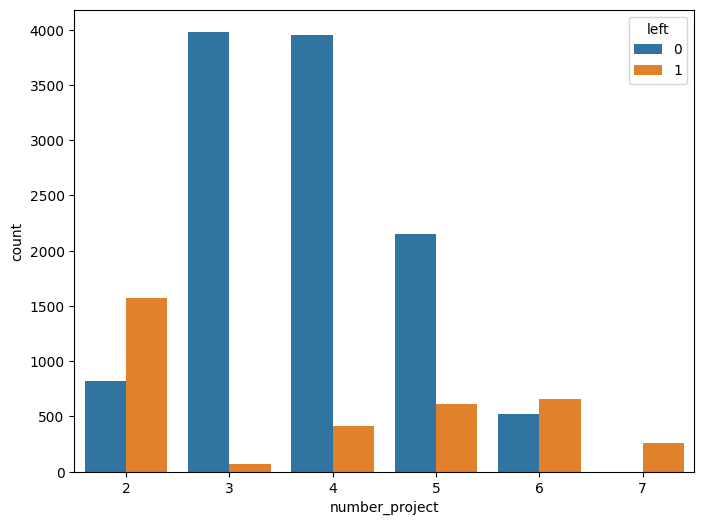

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['number_project'],hue='left',data=data)
plt.show()

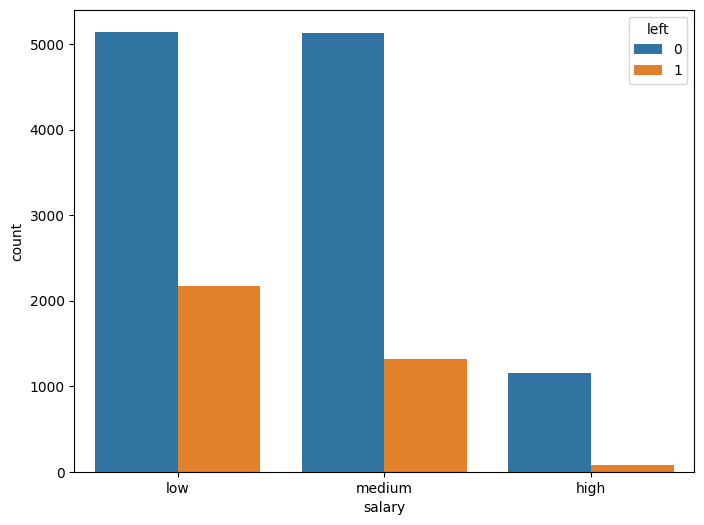

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['salary'],hue='left',data=data)
plt.show()

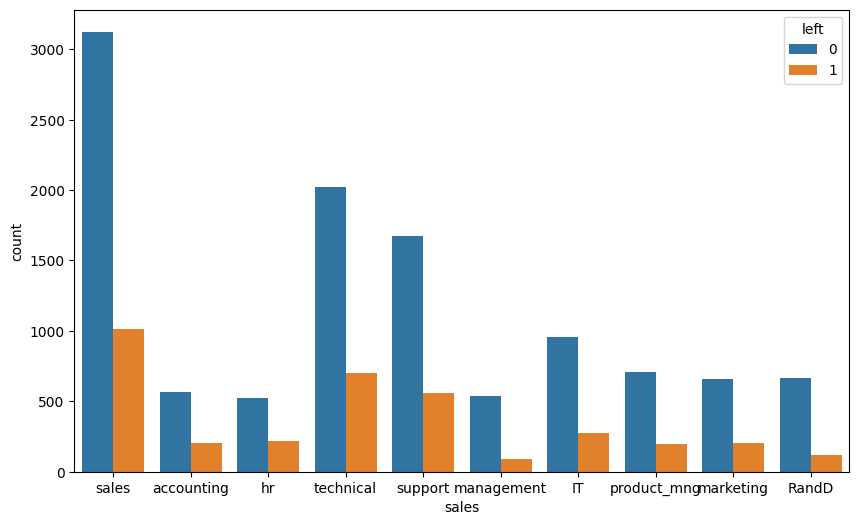

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['sales'],hue='left',data=data)
plt.show()

3.	Perform clustering of employees who left based on their satisfaction and evaluation
3.1.	Choose columns satisfaction_level, last_evaluation and left
3.2.	Do K-Means clustering of employees who left the company into 3 clusters?
3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters


In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [ ]:
# select the relevant columns
cluster_data=data[['satisfaction_level', 'last_evaluation','left']]
left_emp_data=cluster_data[cluster_data['left']==1]

In [ ]:
left_emp_data

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [ ]:
# drop left label
left_emp_data.drop('left',axis=1,inplace=True)

In [ ]:
left_emp_data

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# perform K means
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(left_emp_data)

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 0], dtype=int32)

In [ ]:
# add cluster labels to the dataframe
left_emp_data['cluster']=kmeans.labels_

In [ ]:
left_emp_data


,satisfaction_level,last_evaluation,cluster
0,0.38,0.53,0
1,0.80,0.86,1
2,0.11,0.88,2
3,0.72,0.87,1
4,0.37,0.52,0
...,...,...,...
14994,0.40,0.57,0
14995,0.37,0.48,0
14996,0.37,0.53,0
14997,0.11,0.96,2


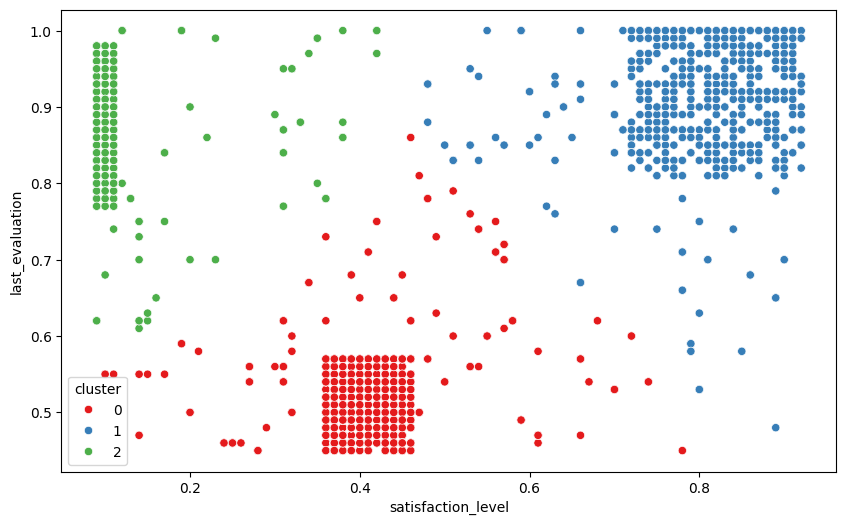

In [ ]:
# visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='satisfaction_level',y='last_evaluation',hue='cluster',palette='Set1',data=left_emp_data)
plt.show()

In [ ]:
left_emp_data['cluster'].value_counts()

0    1650
1     977
2     944
Name: cluster, dtype: int64

4.	Handle the left Class Imbalance using the SMOTE technique
4.1.	Pre-process the data by converting categorical columns to numerical columns by
■	Separating categorical variables and numeric variables.
■	Applying get_dummies() to the categorical variables.
■	Combining categorical variables and numeric variables.
4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123
4.3.	Upsample the train dataset using the SMOTE technique from the imblearn module


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df_numerical=data.select_dtypes(include=['int64','float64'])
df_categorical=data.select_dtypes(include=['object'])

In [ ]:
df_categorical

In [ ]:
# apply dummy encoding
df_converted=pd.get_dummies(data=df_categorical).astype('int')

In [ ]:
df_converted

In [ ]:
# concat the data
df_new=pd.concat([df_numerical,df_converted],axis=1)


In [ ]:
df_new.shape

(14999, 21)

In [ ]:
df_new['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
X=df_new.drop('left',axis=1)
y=df_new['left']

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
# class imbalance
# smote
!pip install imblearn

In [ ]:
y_train.value_counts()

0    9137
1    2862
Name: left, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train_resample,y_train_resample=sm.fit_resample(X_train,y_train)

In [ ]:
y_train_resample.value_counts()

0    9137
1    9137
Name: left, dtype: int64

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


5.	Perform 5-fold cross-validation model training and evaluate performance
5.1.	Train a Logistic Regression model, apply a 5-fold CV, and plot the classification report
5.2.	Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report
5.3.	Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report


In [ ]:
# import library
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

In [ ]:
# apply logistic regression
log_reg=LogisticRegression()
log_reg.fit(X_train_resample,y_train_resample)
y_pred=log_reg.predict(X_test)

In [ ]:
print('Accuracy score',accuracy_score(y_test,y_pred))

Accuracy score 0.76


In [ ]:
print(cross_val_score(log_reg,X_train_resample,y_train_resample).mean())

0.7949556021285821


In [ ]:
print(cross_val_score(log_reg,X_train_resample,y_train_resample))

[0.7622435  0.78221614 0.81340629 0.80328317 0.8136289 ]
